# 内容のまとめ

In [1]:
import numpy       # numpyパッケージを読み込む
import numpy as np # numpyパッケージをnpという名前で読み込む
from numpy import random
    # numpyパッケージの中のrandomモジュールを読み込む
import numpy.random
    # 同じモジュールをnumpy.randomという名前で読み込む
from numpy import * # numpyパッケージの全モジュールを読み込む

## 標準ライブラリ

In [2]:
import time
t1 = time.time()             # 処理前の時刻の取得
for i in range(1000000):     # 計測したい処理
    i ** 10
t2 = time.time()             # 処理後の時刻の取得
elapsed_time = t2-t1
print(elapsed_time)          # 経過時間を表示(sec)

0.6354928016662598


In [3]:
import timeit
def func(): # 計測したい処理を関数化する
    for i in range(1000000):
        i ** 10
time = timeit.timeit("func()", globals=globals(), number=1)
 # 第一引数は処理する関数を文字列で渡す. numberで処理回数を指定
 # globalsは名前空間の指定で関数を認識させるために必要
print(time)

0.4178159940000796


In [4]:
%%timeit
for i in range(1000000):     # 計測したい処理
    i ** 10

642 ms ± 213 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
import cProfile
def func():      # 計測したい処理を関数化する
    def func1():
        for i in range(3000000): i**2 
        # 中身が１行であれば、このように改行を省いても良い
    def func2():
        for i in range(100000): i**2
    func1()
    func2()
    func2()
cProfile.run("func()")    # run関数に処理を渡して実行 

         7 function calls in 2.004 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.004    2.004 <ipython-input-5-5d1ef418b7fa>:2(func)
        1    1.916    1.916    1.916    1.916 <ipython-input-5-5d1ef418b7fa>:3(func1)
        2    0.088    0.044    0.088    0.044 <ipython-input-5-5d1ef418b7fa>:6(func2)
        1    0.000    0.000    2.004    2.004 <string>:1(<module>)
        1    0.000    0.000    2.004    2.004 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [6]:
# テキストには含まれない
%%prun
func()

## NumPy

In [7]:
import numpy as np
a = np.array([1, 2, 3])

In [8]:
np.zeros(2)             # 要素がすべて0の1次元配列
np.ones((2,2))          # 要素がすべて1の2次元配列
np.arange(2,9,2)        # 2以上9未満の偶数のみの配列
np.linspace(0, 10, 5)   # 0以上10以下、2.5刻みの配列
np.eye(10)              # 10 x 10の単位行列を生成

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [9]:
a = np.ones(3, dtype=int) # dtypeで要素の型を指定できる
                          # 多くの場合, デフォルト値はfloat
a[1] = 2.2                # 切り捨てられてa = [1,2,1]となる

In [10]:
a = np.array([2, 1, 5, 3, 7, 4, 6, 8])
np.sort(a)   # a.sort()でも良い. その場合はソートして上書きする

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
a = np.array([1, 2, 2, 4])
b = np.array([5, 6, 7, 8])
c = a[:3] # 0-2番目の要素を取り出す(スライス)
          # スライスには様々な使い方がある
          # a[1:3], a[::2], a[-1], a[::-1]なども確認してみよう
d = np.append(a, b)     # 2つの配列の結合
e = a.reshape(2, 2)     # 配列の形状を任意に変換
f = e.flatten()         # 多次元配列を1次元配列に変換
g = d.shape             # ndarrayの形状をタプルで取得 

In [12]:
h = np.nonzero(a==2)[0] # a==2を満たすインデックスを取得
i = np.where(a==2,4,0)  # a==2の要素を4, それ以外を0とする配列
j = e[0, :]   # 2次元配列の0行目を取り出す. e[:, 0]だと0列目
k = b[h]      # int型の配列はインデックス指定にも使用できる
d[d < 3] = 0  # 配列dの3未満の要素を0にする

In [13]:
m = 2.0*a              # 全ての要素に係数をかける.  
n = a*b                # 要素ごとの積
o = a**3               # 各要素のべき乗  
p = np.dot(a,b)        # ベクトルの内積
q = a + 1j*b           # 要素ごとの和. 複素数のndarrayに対して, 
  # np.conj(q)=a-1j*b, np.real(q)=a, np.imag(q)=bなどとなる
r = a[:,None] + b[None,:]
  # s_ij = a_i + b_jを要素とする2次元配列を所得する
s = 2 + a 
  # スカラー量との加減算は2 => 2*np.ones(a.shape)と解釈される

In [14]:
N, a = 10000, []
for i in range(N):
    x = np.exp(2j*np.pi*i/N)
    # np.expはネイピア数eを底とする指数関数. np.piは円周率を表す
    a.append(x)
a = np.array(a)

In [15]:
a = np.arange(N)/N     # np.linspaceを用いても良い
a = np.exp(2j*np.pi*a)

In [16]:
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])
A * B               # 要素ごとの積
A @ B               # 行列としての積 (= sum_j A_ij*B_jk)
A.T                 # 転置行列を得る

array([[1, 0],
       [1, 1]])

In [17]:
A = np.array([[1,2,3],[2,1,2],[3,2,1]])
np.linalg.det(A)               # 行列式の計算
np.linalg.inv(A)               # 逆行列の計算
e, v = np.linalg.eigh(A)       # エルミート行列の対角化

In [18]:
a = np.random.randn(5, 5)           # 5 x 5の乱数行列を生成
b = np.einsum("ii", a)              # np.trace(a) と同じ
c = np.einsum("ij,jk->ik", a, a)    # a @ a
d = np.einsum("ii,ij->j", a, a)     # np.diag(a) @ a
e = np.einsum("ij,kj,ki", a, a, a)  # np.trace(a @ a.T @ a)

## SciPy

In [19]:
import scipy.special       # scipy.specialパッケージを読みこむ
from scipy import special  # 上と同様だが、名前がspecialとなる

In [20]:
from scipy import special
special.jv(0,0)        # 第一引数はv, 第二引数はzの値
special.jv(0,[0,1,2])  # リストやnp.ndarrayなどにも対応している

array([1.        , 0.76519769, 0.22389078])

In [21]:
from scipy import integrate
def func(x):
    return special.jv(2.5, x)
res = integrate.quad(func, 0, 5) 
    # 第1引数は被積分関数, 第2, 3引数は積分の下限と上限
res = integrate.quad(lambda x:special.jv(2.5,x), 0, 5)
    # ラムダ式を直接引数に入れることもできる

In [22]:
import numpy as np
from scipy.fft import fft
N, T = 600, 1/800     # サンプリング数とサンプリング間隔の定義
x = np.linspace(0, N*T, N, endpoint=False)
y = np.sin(50*2*np.pi*x) + 0.5*np.sin(80*2*np.pi*x)
yf = fft(y)           # フーリエ変換

## Matplotlib

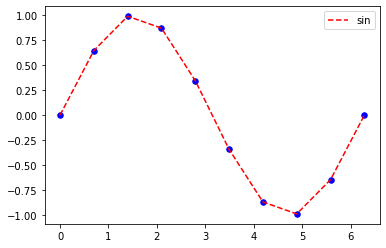

In [23]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)             # プロットしたい1次元配列を準備
plt.plot(x, y, color="red", linestyle="dashed", label="sin")
  # x, y座標のデータの他、色やスタイル、凡例の指定ができる
plt.scatter(x, y, s=30, c="blue")
  # 散布図プロットにはscatterを用いる
plt.legend()              # 凡例の表示
plt.show()                # 描画

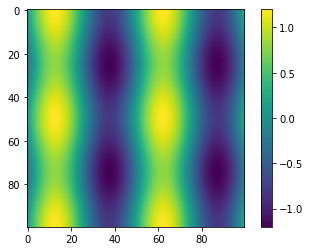

In [24]:
a = np.linspace(0, 4*np.pi, 100)
x, y = np.meshgrid(a, a)       # 2次元メッシュの生成
z = np.sin(x) + 0.2*np.cos(y)  # プロットしたい配列の準備
plt.imshow(z)
plt.colorbar()                 # カラーバーを表示
plt.show()

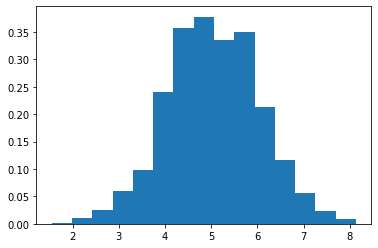

In [25]:
x = np.random.normal(5, 1, 1000)
  # 平均5, 標準偏差1の乱数を1000点生成して一次元配列にする
plt.hist(x, bins=15, density=True)
  # ヒストグラムの計算. binsはビン数の指定. density=Trueは規格化
plt.show()

# 例題1 NumPyを用いた平均と分散の計算

In [26]:
n = 5000
a = np.random.randn(n)

In [27]:
%%timeit
mean, mean2 = 0, 0
for x in a:
    mean += x
    mean2 += x**2
mean, sigma = mean/n, mean2/n - (mean/n)**2

5.23 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%%timeit
mean, sigma = np.mean(a), np.var(a)

42.9 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 例題2 MatplotlibとScipyによる特殊関数のプロット

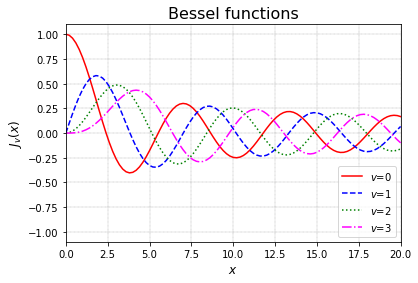

In [29]:
import scipy.special as special
import matplotlib.pyplot as plt
x = np.linspace(0,20,101)                # 変数値の設定
J = [special.jv(v,x) for v in range(4)]  # 関数を各v, xで評価
labs = ["$v$="+str(v) for v in range(4)]
cols = ["red", "blue", "green", "magenta"]
stys = ["-", "--", ":", "-."]
for j, l, c, s in zip(J, labs, cols, stys):
    plt.plot(x, j, color=c, label=l, linestyle=s)
    # このように、関数値やラベルなどをリストとして保持しておき, 
    # zipで繋げて使用すると良いだろう

plt.title("Bessel functions",fontsize=16) # タイトルの設定
plt.xlabel("$x$", fontsize=12)            # x軸ラベルの設定
plt.xlim(0, 20)                           # x軸範囲の設定
plt.ylabel("$J_v(x)$", fontsize=12)       # y軸ラベルの設定
plt.ylim(-1.1, 1.1)                       # y軸範囲の設定
plt.legend(loc="lower right")  # 凡例の表示. locは場所を指定
plt.grid(color="black", linestyle="dotted", linewidth=0.3)
  # グリッドの表示. グリッドがあることでプロットが見やすくなる
plt.show()